## Personality Predictor

In [113]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from collections import Counter
from PIL import Image

# Always make it pretty.
plt.style.use('ggplot')

## Data set came in a csv so we can simply load it

In [27]:
raw = pd.read_csv('mbti_1 2.csv')

In [3]:
raw.head()

type                                              posts
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1  ENTP  'I'm finding the lack of me in these posts ver...
2  INTP  'Good one  _____   https://www.youtube.com/wat...
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...
4  ENTJ  'You're fired.|||That's another silly misconce...

In [380]:
df2 = raw

## Loading the frequency of each personality type found in the population
Data source: "MBTI Manual" published by CPP

In [289]:
population = pd.read_csv('TypePopulation.csv')
population.head()

Type Frequency
0  ISFJ     13.8%
1  ESFJ     12.3%
2  ISTJ     11.6%
3  ISFP      8.8%
4  ESTJ      8.7%

In [279]:
#cleaning this up so we can merge it with the dataset above
typecount = raw.groupby('type').agg({'type':'count'})
typecount['Type']=typecount.index
typecount.columns = ['Count','Type']
typecount.head()

Count  Type
type             
ENFJ    190  ENFJ
ENFP    675  ENFP
ENTJ    231  ENTJ
ENTP    685  ENTP
ESFJ     42  ESFJ

In [317]:
dfsummary = pd.merge(population, typecount, on='Type')
dfsummary

Type Frequency  Count
0   ISFJ     13.8%    166
1   ESFJ     12.3%     42
2   ISTJ     11.6%    205
3   ISFP      8.8%    271
4   ESTJ      8.7%     39
5   ESFP      8.5%     48
6   ENFP      8.1%    675
7   ISTP      5.4%    337
8   INFP      4.4%   1832
9   ESTP      4.3%     89
10  INTP      3.3%   1304
11  ENTP      3.2%    685
12  ENFJ      2.5%    190
13  INTJ      2.1%   1091
14  ENTJ      1.8%    231
15  INFJ      1.5%   1470

## Plotting frequency of personality types in our dataset against that found in the world

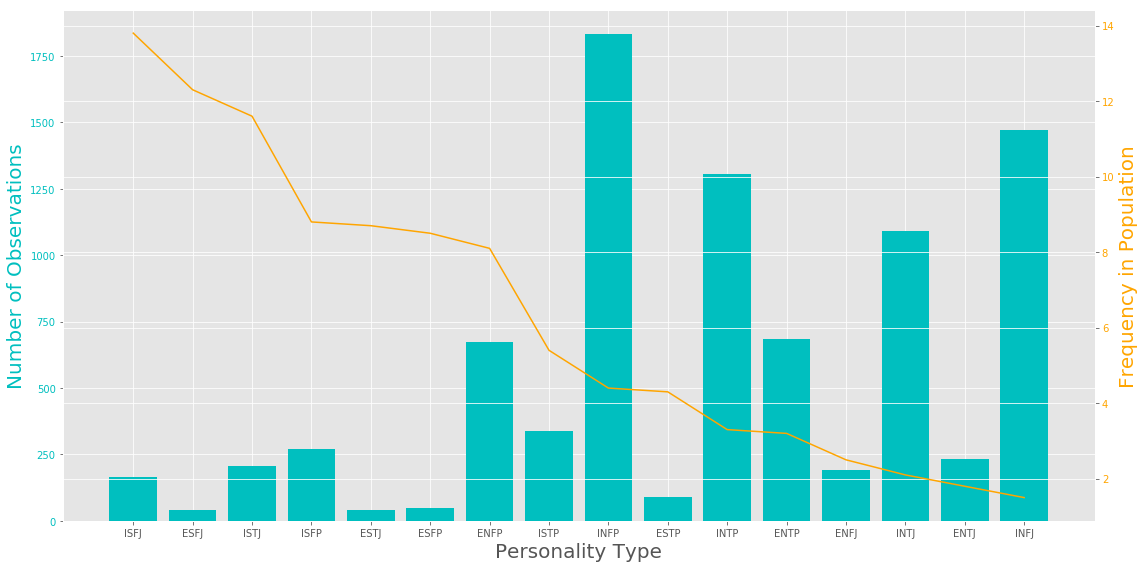

In [383]:
fig, ax1 = plt.subplots(figsize=(16,8))

color = 'c'
ax1.set_xlabel('Personality Type',size = 20)
ax1.set_ylabel('Number of Observations', color=color,size=20)
ax1.bar(dfsummary.Type,dfsummary.Count, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color2 = 'orange'
ax2.set_ylabel('Frequency in Population', color=color2,size=20)
ax2.plot(dfsummary.Type, dfsummary.Frequency, color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

fig.tight_layout()
plt.show()

## Continue deriving stats from the dataset

In [316]:
raw['Words'] = raw['posts'].apply(lambda x: len(x.split())/50)
raw['Links'] = raw['posts'].apply(lambda x: x.count('http')/50)
raw['Questions'] = raw['posts'].apply(lambda x: x.count('?')/50)
raw.head()

type                                              posts  Links  Questions  \
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...   0.48       0.36   
1  ENTP  'I'm finding the lack of me in these posts ver...   0.20       0.10   
2  INTP  'Good one  _____   https://www.youtube.com/wat...   0.10       0.24   
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...   0.04       0.22   
4  ENTJ  'You're fired.|||That's another silly misconce...   0.12       0.20   

   Words  
0  11.12  
1  23.40  
2  16.72  
3  21.28  
4  19.34

In [323]:
Ws = raw.groupby('type').agg({'Words':'mean'})
Qs = raw.groupby('type').agg({'Questions':'mean'})
Ls = raw.groupby('type').agg({'Links':'mean'})

In [326]:
dfsummary = merge_to_df(dfsummary,Ws,'Words')
dfsummary = merge_to_df(dfsummary,Qs,'Questions')
dfsummary = merge_to_df(dfsummary,Ls,'Links')

Type Frequency  Count    Words_x    Words_y  Questions_x   Links_x  \
0   ISFJ     13.8%    166  24.825904  24.825904     0.200964  0.070602   
1   ESFJ     12.3%     42  25.809524  25.809524     0.176190  0.027143   
2   ISTJ     11.6%    205  24.264488  24.264488     0.214927  0.061171   
3   ISFP      8.8%    271  22.727675  22.727675     0.216384  0.088339   
4   ESTJ      8.7%     39  24.590769  24.590769     0.209744  0.052821   
5   ESFP      8.5%     48  20.442500  20.442500     0.237083  0.055417   
6   ENFP      8.1%    675  25.215407  25.215407     0.227259  0.050459   
7   ISTP      5.4%    337  23.311276  23.311276     0.221602  0.081009   
8   INFP      4.4%   1832  24.891059  24.891059     0.202533  0.075426   
9   ESTP      4.3%     89  23.251910  23.251910     0.245843  0.064719   
10  INTP      3.3%   1304  23.955261  23.955261     0.221580  0.070767   
11  ENTP      3.2%    685  24.119912  24.119912     0.220964  0.048263   
12  ENFJ      2.5%    190  25.731684  25.731684     0.213053  0.053263   
13  INTJ      2.1%   1091  23.891549  23.891549     0.214849  0.063593   
14  ENTJ      1.8%    231  24.361732  24.361732     0.240000  0.053160   
15  INFJ      1.5%   1470  25.568639  25.568639     0.208966  0.065878   

    Questions_y   Links_y      Words  Questions     Links  
0      0.200964  0.070602  24.825904   0.200964  0.070602  
1      0.176190  0.027143  25.809524   0.176190  0.027143  
2      0.214927  0.061171  24.264488   0.214927  0.061171  
3      0.216384  0.088339  22.727675   0.216384  0.088339  
4      0.209744  0.052821  24.590769   0.209744  0.052821  
5      0.237083  0.055417  20.442500   0.237083  0.055417  
6      0.227259  0.050459  25.215407   0.227259  0.050459  
7      0.221602  0.081009  23.311276   0.221602  0.081009  
8      0.202533  0.075426  24.891059   0.202533  0.075426  
9      0.245843  0.064719  23.251910   0.245843  0.064719  
10     0.221580  0.070767  23.955261   0.221580  0.070767  
11     0.220964  0.048263  24.119912   0.220964  0.048263  
12     0.213053  0.053263  25.731684   0.213053  0.053263  
13     0.214849  0.063593  23.891549   0.214849  0.063593  
14     0.240000  0.053160  24.361732   0.240000  0.053160  
15     0.208966  0.065878  25.568639   0.208966  0.065878

In [329]:
dfsummary

Type Frequency  Count      Words  Questions     Links
0   ISFJ     13.8%    166  24.825904   0.200964  0.070602
1   ESFJ     12.3%     42  25.809524   0.176190  0.027143
2   ISTJ     11.6%    205  24.264488   0.214927  0.061171
3   ISFP      8.8%    271  22.727675   0.216384  0.088339
4   ESTJ      8.7%     39  24.590769   0.209744  0.052821
5   ESFP      8.5%     48  20.442500   0.237083  0.055417
6   ENFP      8.1%    675  25.215407   0.227259  0.050459
7   ISTP      5.4%    337  23.311276   0.221602  0.081009
8   INFP      4.4%   1832  24.891059   0.202533  0.075426
9   ESTP      4.3%     89  23.251910   0.245843  0.064719
10  INTP      3.3%   1304  23.955261   0.221580  0.070767
11  ENTP      3.2%    685  24.119912   0.220964  0.048263
12  ENFJ      2.5%    190  25.731684   0.213053  0.053263
13  INTJ      2.1%   1091  23.891549   0.214849  0.063593
14  ENTJ      1.8%    231  24.361732   0.240000  0.053160
15  INFJ      1.5%   1470  25.568639   0.208966  0.065878

## Create a dictionary with all the observations of each Personality Type

In [180]:
d={}
for ptype in raw['type'].unique():
        d[ptype]=raw.loc[raw['type'] == ptype,'posts':'posts']
        d[ptype].reset_index(drop=True, inplace=True)
d

{'INFJ':                                                   posts
 0     'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
 1     'No, I can't draw on my own nails (haha). Thos...
 2     I'm not sure, that's a good question. The dist...
 3     'One time my parents were fighting over my dad...
 4     'Joe santagato - ENTP|||ENFJ or  ENTP?   I'm n...
 5     'some of these both excite and calm me:  BUTTS...
 6     'I fully believe in the power of being a prote...
 7     'It is very annoying to be misinterpreted. Esp...
 8     'I think that that can absolutely be true of i...
 9     it could be pyroluria.. you know.. it is an on...
 10    'Sometimes I wonder that too.. the reason bein...
 11    http://www.youtube.com/watch?v=ipUdoUcNmKI  ht...
 12    'Trying not to feel totally worthless...  Why ...
 13    'Me: INFJ Mom: ISTJ Dad: ENFJ Sister: ISTJ|||I...
 14    'I would strongly recommend not taking shortcu...
 15    'than you may be an ambivert, somewhere in the...
 16    'Yeah i'm an a-h

## Get the word frequency by personality type

In [339]:
d2 = {}
for k,v in d.items():
    d2[k] = wordFrequency(v['posts'])
d2['INTP'].most_common(30)

[('I', 66276),
 ('', 44667),
 ('to', 42767),
 ('the', 42424),
 ('a', 34228),
 ('and', 30648),
 ('of', 27854),
 ('is', 19964),
 ('that', 19351),
 ('you', 18214),
 ('in', 17405),
 ('my', 14340),
 ('it', 14013),
 ('have', 11728),
 ('for', 11712),
 ('with', 10944),
 ('but', 10830),
 ('be', 10382),
 ("I'm", 9747),
 ('are', 9697),
 ('not', 9300),
 ('an', 8655),
 ('like', 8504),
 ('on', 8386),
 ('as', 8168),
 ('was', 8023),
 ('this', 7458),
 ('me', 7274),
 ('just', 7037),
 ("don't", 6908)]

## Getting the most common words

In [359]:
common_words = wordFrequency(raw['posts'])
common_words.most_common(30)

[('I', 463694),
 ('', 317599),
 ('to', 290296),
 ('the', 271111),
 ('a', 231152),
 ('and', 219676),
 ('of', 177901),
 ('you', 129537),
 ('is', 128915),
 ('that', 127521),
 ('in', 117384),
 ('my', 105005),
 ('it', 93656),
 ('for', 83151),
 ('have', 79840),
 ('with', 77180),
 ('but', 74834),
 ("I'm", 70560),
 ('be', 69359),
 ('are', 65107),
 ('like', 61449),
 ('not', 59700),
 ('an', 59057),
 ('on', 57126),
 ('was', 56169),
 ('me', 55821),
 ('as', 53400),
 ('this', 53053),
 ('just', 48449),
 ('about', 46334)]

In [376]:
#creating a list of the most common words
remove = []
for item in common_words.most_common(30):
    remove.append(' '+item[0]+' ')
remove

[' I ',
 '  ',
 ' to ',
 ' the ',
 ' a ',
 ' and ',
 ' of ',
 ' you ',
 ' is ',
 ' that ',
 ' in ',
 ' my ',
 ' it ',
 ' for ',
 ' have ',
 ' with ',
 ' but ',
 " I'm ",
 ' be ',
 ' are ',
 ' like ',
 ' not ',
 ' an ',
 ' on ',
 ' was ',
 ' me ',
 ' as ',
 ' this ',
 ' just ',
 ' about ']

## Functions

In [64]:
def wordFrequency(series):
    '''Takes in the ['posts'] column and creates a dictionary of the words 
    found where the values are the frequncy of the word

    Parameters
    ----------
    series: a pandas.series

    Returns
    -------
    dictionary
    '''
    count = Counter()
    for posts in series:
        pt = posts.split('|||')
        for sentance in pt:
            words = sentance.split(' ')
            for w in words:
                count[w] += 1
    return count

In [184]:
def transform_mask(matrix):
    '''Takes a 2D Matrix in and changes the 0 values to 255

    Parameters
    ----------
    Matrix: 2D matrix

    Returns
    -------
    list
    '''
    l =[]
    for n in matrix:
        if n == 0:
            l.append(255)
        else:
            l.append(n)
    return l

In [335]:
def merge_to_df(df,series,newcol):
    ''' Prepares a series to be merged with my summary df.
    Checks to see if the column exists, if it doesn't it returns
    the merged dataframe.
    
    Parameters
    ----------
    df: pandas.dataframe
    series: a pandas.series
    newcol: String
    

    Returns
    -------
    series
    '''
    series['Type']=series.index
    series.coulmns = [newcol,'Type']
    if newcol in df.columns:
        return "Coloumn already in dataframe"
    else:
        return pd.merge(df, series, on='Type')

In [377]:
def clean_text(string):
    '''Removes all common text from the line and returns a cleaned version of the line
    String.
    
    Parameters
    ----------
    series: a pandas.series

    Returns
    -------
    String
    '''
    for char in remove:
        string = string.replace(char,' ')
    return string

## Word Clouds

### Need to clean up the words the text so we can create word clouds from it

In [381]:
df2['posts'] = df2['posts'].apply(lambda x: clean_text(x))
df2['posts'][0]

"'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp intj moments https://www.youtube.com/watch?v=iz7lE1g4XM4 sportscenter top ten plays https://www.youtube.com/watch?v=uCdfze1etec pranks|||What has been most life-changing experience your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8  http://www.youtube.com/watch?v=u8ejam5DP3E On repeat most today.|||May PerC Experience immerse you.|||The last thing INFJ friend posted his facebook before committing suicide next day. Rest peace~  http://vimeo.com/22842206|||Hello ENFJ7. Sorry hear your distress. It's only natural relationship perfection all time every moment existence. Try figure hard times times growth, as...|||84389 84390 http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ...|||Welcome stuff.|||http://playeressence.com/wp-content/uploads/2013/08/RED-red-the-pokemon-ma

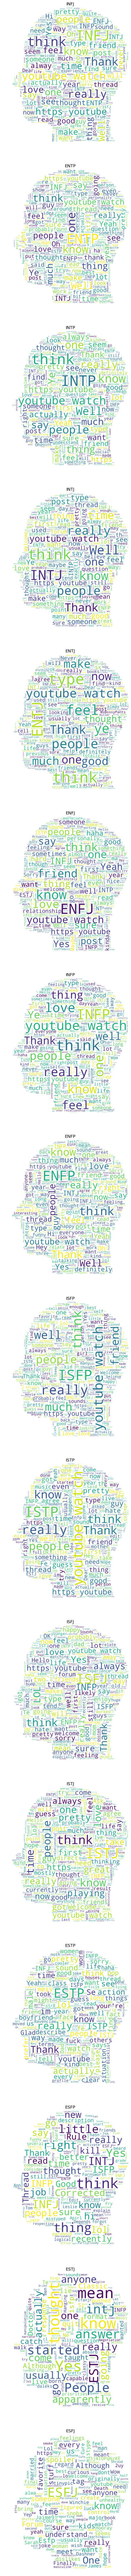

In [388]:
from scipy.misc import imread
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

fig, ax = plt.subplots(len(raw['type'].unique()), sharex=True, 
                       figsize=(15,10*len(df2['type'].unique())))

x = 0 #will serve as our plot index
for i in df2['type'].unique():
    df = df2[df2['type'] == i]
    wordcloud = WordCloud(background_color="white", max_words=500, 
                          mask=transformed_head_mask).generate(df['posts'].to_string())
    ax[x].imshow(wordcloud, interpolation='bilinear')
    ax[x].set_title(i)
    ax[x].axis("off")
    wordcloud.to_file("{}.png".format(i))
    x+=1

In [148]:
head_mask = np.array(Image.open("head2.png"))
head_mask

(1795, 1560, 4)

In [385]:
transformed_head_mask = np.ndarray((head_mask.shape[0],head_mask.shape[1], 
                                    head_mask.shape[2]),np.int32)
transformed_head_mask
for i in range(len(head_mask)):
    transformed_head_mask[i] = list(map(transform_mask, head_mask[i]))

In [386]:
transformed_head_mask[0]

array([[255, 255, 255, 255],
       [255, 255, 255, 255],
       [255, 255, 255, 255],
       ...,
       [255, 255, 255, 255],
       [255, 255, 255, 255],
       [255, 255, 255, 255]], dtype=int32)

In [350]:
dfsummary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 0 to 15
Data columns (total 6 columns):
Type         16 non-null object
Frequency    16 non-null float64
Count        16 non-null int64
Words        16 non-null float64
Questions    16 non-null float64
Links        16 non-null float64
dtypes: float64(4), int64(1), object(1)
memory usage: 1.5+ KB


In [351]:
dfsummary.describe()

Frequency        Count      Words  Questions      Links
count  16.000000    16.000000  16.000000  16.000000  16.000000
mean    6.268750   542.187500  24.184956   0.216996   0.061377
std     4.023385   576.700756   1.342293   0.016736   0.014662
min     1.500000    39.000000  20.442500   0.176190   0.027143
25%     3.025000   146.750000  23.746481   0.209549   0.053075
50%     4.900000   251.000000  24.313110   0.215655   0.062382
75%     8.725000   786.500000  24.972146   0.223017   0.070644
max    13.800000  1832.000000  25.809524   0.245843   0.088339

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a60aa3fd0>,
      dtype=object)

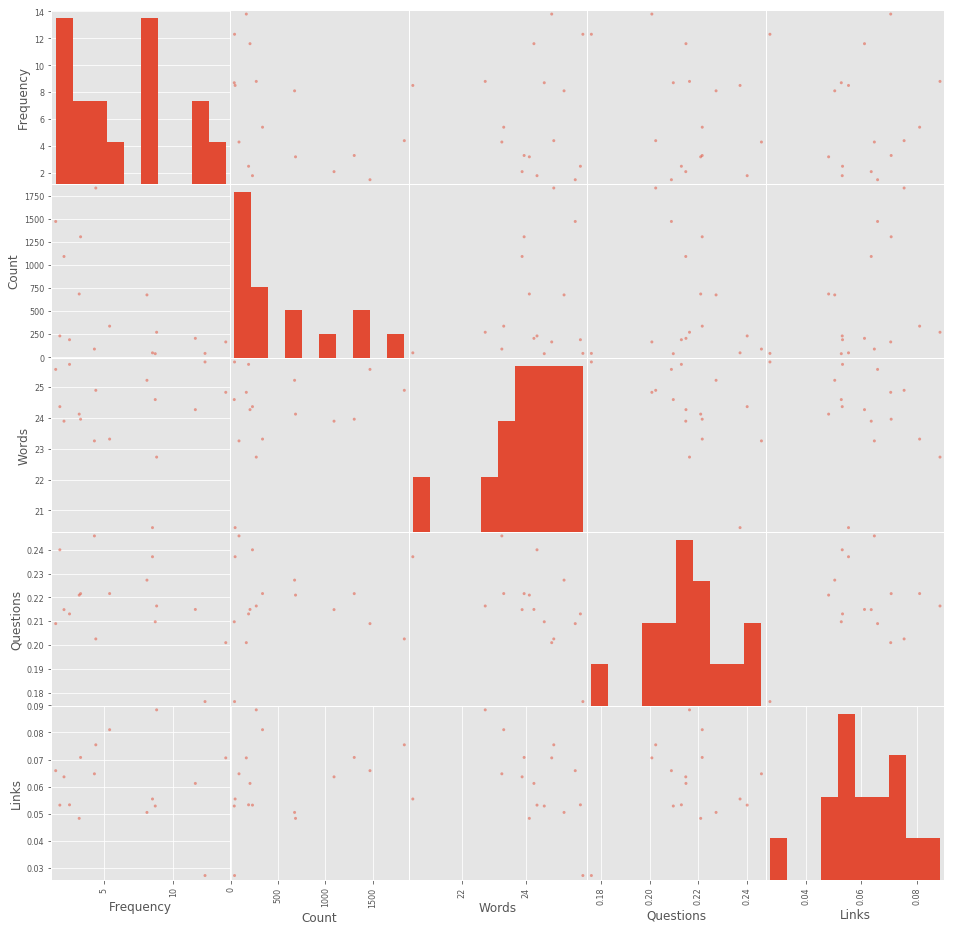

In [353]:
pd.plotting.scatter_matrix(dfsummary,figsize=(16,16))